In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime

In [2]:
from math import sqrt
SPINE_COLOR = 'gray'

def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 3.39 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean +1.1 # height in inches
        
    fig_height = fig_height * (2/3)    
        
    MAX_HEIGHT_INCHES = 8.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
              'text.latex.preamble': ['\\usepackage{gensymb}'],
              'axes.labelsize': 8, # fontsize for x and y labels (was 10)
              'axes.titlesize': 8,
              'text.fontsize': 8, # was 10
              'legend.fontsize': 8, # was 10
              'xtick.labelsize': 8,
              'ytick.labelsize': 8,
              'text.usetex': True,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif'
    }

    matplotlib.rcParams.update(params)


def format_axes(ax):

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)

    return ax

# HDT

In [3]:
results_hdt = pd.read_csv("output_time_hdt_1M.log")
results_hdt = results_hdt.iloc[0:20*5]

results_hdt["query"] = results_hdt["query"].str.extract(r'watdiv/watdiv/bin/Release/datasets/1M/gen_queries/gen_queries_([0-9]+_.*)\.txt')
results_hdt["query_type"] = results_hdt["query"].str.replace(r"[0-9]+_", "")

results_hdt['t'] = results_hdt["time"].apply(lambda x: datetime.datetime.strptime(x,' %M:%S.%f'))
results_hdt['td'] = results_hdt.t - datetime.datetime.strptime('00:00.0','%M:%S.%f')
results_hdt['time'] = results_hdt['td'].apply(lambda x: x / np.timedelta64(1, 's'))

# Averages per query type
averages_hdt = results_hdt.groupby(["query_type"]).mean()
averages_hdt["query_class"] = averages_hdt.index.str.replace(r"[0-9]", "")

# Averages per query class
averages_class_hdt = averages_hdt.groupby(["query_class"]).mean()

# Spark

In [4]:
results_spark = pd.read_csv("output_time_spark_1M.log")
results_spark = results_spark.iloc[0:20*5]

results_spark["query"] = results_spark["query"].str.extract(r'watdiv/watdiv/bin/Release/datasets/1M/gen_queries/gen_queries_([0-9]+_.*)\.txt')
results_spark["query_type"] = results_spark["query"].str.replace(r"[0-9]+_", "")

results_spark['t'] = results_spark["time"].apply(lambda x: datetime.datetime.strptime(x,' %M:%S.%f'))
results_spark['td'] = results_spark.t - datetime.datetime.strptime('00:00.0','%M:%S.%f')
results_spark['time'] = results_spark['td'].apply(lambda x: x / np.timedelta64(1, 's'))

# Averages per query type
averages_spark = results_spark.groupby(["query_type"]).mean()
averages_spark["query_class"] = averages_spark.index.str.replace(r"[0-9]", "")

# Averages per query class
averages_class_spark = averages_spark.groupby(["query_class"]).mean()

# Spark IT

In [5]:
results_spark_it = pd.read_csv("output_time_spark_it_1M.log")
results_spark_it = results_spark_it.iloc[0:20*5]

results_spark_it["query"] = results_spark_it["query"].str.extract(r'watdiv/watdiv/bin/Release/datasets/1M/gen_queries/gen_queries_([0-9]+_.*)\.txt')
results_spark_it["query_type"] = results_spark_it["query"].str.replace(r"[0-9]+_", "")

results_spark_it['t'] = results_spark_it["time"].apply(lambda x: datetime.datetime.strptime(x,' %M:%S.%f'))
results_spark_it['td'] = results_spark_it.t - datetime.datetime.strptime('00:00.0','%M:%S.%f')
results_spark_it['time'] = results_spark_it['td'].apply(lambda x: x / np.timedelta64(1, 's'))

# Averages per query type
averages_spark_it = results_spark_it.groupby(["query_type"]).mean()
averages_spark_it["query_class"] = averages_spark_it.index.str.replace(r"[0-9]", "")

# Averages per query class
averages_class_spark_it = averages_spark_it.groupby(["query_class"]).mean()

# Spark IT Sorted

In [6]:
results_spark_its = pd.read_csv("output_time_spark_500k_its.log")
results_spark_its = results_spark_its.iloc[0:20*5]

results_spark_its["query"] = results_spark_its["query"].str.extract(r'watdiv/watdiv/bin/Release/datasets/500k/gen_queries/gen_queries_([0-9]+_.*)\.txt')
results_spark_its["query_type"] = results_spark_its["query"].str.replace(r"[0-9]+_", "")

results_spark_its['t'] = results_spark_its["time"].apply(lambda x: datetime.datetime.strptime(x,' %M:%S.%f'))
results_spark_its['td'] = results_spark_its.t - datetime.datetime.strptime('00:00.0','%M:%S.%f')
results_spark_its['time'] = results_spark_its['td'].apply(lambda x: x / np.timedelta64(1, 's'))

# Averages per query type
averages_spark_its = results_spark_its.groupby(["query_type"]).mean()
averages_spark_its["query_class"] = averages_spark_its.index.str.replace(r"[0-9]", "")

# Averages per query class
averages_class_spark_its = averages_spark_its.groupby(["query_class"]).mean()

CParserError: Error tokenizing data. C error: Expected 1 fields in line 9, saw 2


# Impala

In [12]:
import re
pattern = re.compile("^ .*:.*:.*")

def parse_date(date):
    if pattern.match(date):
        return datetime.datetime.strptime(date,' %H:%M:%S')
    else:
        return datetime.datetime.strptime(date,' %M:%S.%f')

In [7]:
results_impala = pd.read_csv("output_time_impala.500k.new.log")
results_impala = results_impala.iloc[0:20*5]

results_impala["query"] = results_impala["query"].str.extract(r'watdiv/watdiv/bin/Release/datasets/500k/gen_queries/gen_queries_([0-9]+_.*)\.txt')
results_impala["query_type"] = results_impala["query"].str.replace(r"[0-9]+_", "")

results_impala['t'] = results_impala["time"].apply(lambda x: parse_date(x))
results_impala['td'] = results_impala.t - datetime.datetime.strptime('00:00.0','%M:%S.%f')
results_impala['time'] = results_impala['td'].apply(lambda x: x / np.timedelta64(1, 's'))

# Averages per query type
averages_impala = results_impala.groupby(["query_type"]).mean()
averages_impala["query_class"] = averages_impala.index.str.replace(r"[0-9]", "")

# Averages per query class
averages_class_impala = averages_impala.groupby(["query_class"]).mean()

# Impala IT

In [8]:
results_impala_it = pd.read_csv("output_time_impala_it.500k.new.log")
results_impala_it = results_impala_it.iloc[0:20*5]

results_impala_it["query"] = results_impala_it["query"].str.extract(r'watdiv/watdiv/bin/Release/datasets/500k/gen_queries/gen_queries_([0-9]+_.*)\.txt')
results_impala_it["query_type"] = results_impala_it["query"].str.replace(r"[0-9]+_", "")

results_impala_it['t'] = results_impala_it["time"].apply(lambda x: parse_date(x))
results_impala_it['td'] = results_impala_it.t - datetime.datetime.strptime('00:00.0','%M:%S.%f')
results_impala_it['time'] = results_impala_it['td'].apply(lambda x: x / np.timedelta64(1, 's'))

# Averages per query type
averages_impala_it = results_impala_it.groupby(["query_type"]).mean()
averages_impala_it["query_class"] = averages_impala_it.index.str.replace(r"[0-9]", "")

# Averages per query class
averages_class_impala_it = averages_impala_it.groupby(["query_class"]).mean()

# Table

In [9]:
queries = ["C1", "C2", "C3", "F1", "F2", "F3", "F4", "F5", "L1", "L2", "L3", "L4", "L5", "S1", "S2", "S3", "S4", "S5", "S6", "S7"]

for i in range(20):
    print(queries[i] + 
         " & " + str(round(averages_hdt.iloc[i]["time"],5)) +
          " & " + str(round(averages_spark.iloc[i]["time"],5)) +
          " & " + str(round(averages_spark_it.iloc[i]["time"],5)) +
          " & " +
          #" & " + str(round(averages_spark_its.iloc[i]["time"],5)) +
          " & " + str(round(averages_impala.iloc[i]["time"],5)) +
          " & " + str(round(averages_impala_it.iloc[i]["time"],5)) +
          " \\\\"
          )

C1 & 1.322 & 29.912 & 47.71 &  & 293.232 & 231.246 \\
C2 & 3.356 & 91.402 & 143.324 &  & 1230.456 & 1294.27 \\
C3 & 13.61 & 426.16 & 644.752 &  & 6084.6 & 6351.8 \\
F1 & 0.414 & 3.384 & 4.808 &  & 19.508 & 31.862 \\
F2 & 0.516 & 4.802 & 7.93 &  & 58.65 & 46.618 \\
F3 & 0.398 & 3.75 & 5.774 &  & 39.438 & 41.116 \\
F4 & 0.664 & 8.558 & 13.066 &  & 76.702 & 102.682 \\
F5 & 0.666 & 9.232 & 14.708 &  & 127.958 & 134.418 \\
L1 & 0.502 & 7.634 & 11.494 &  & 59.64 & 78.65 \\
L2 & 1.178 & 36.712 & 67.298 &  & 366.28 & 382.58 \\
L3 & 0.358 & 3.338 & 4.752 &  & 35.028 & 36.228 \\
L4 & 0.386 & 4.592 & 7.876 &  & 43.318 & 44.842 \\
L5 & 0.366 & 2.48 & 3.928 &  & 25.652 & 13.014 \\
S1 & 0.798 & 14.79 & 23.954 &  & 163.516 & 172.188 \\
S2 & 0.34 & 1.652 & 2.776 &  & 18.162 & 18.988 \\
S3 & 0.546 & 9.462 & 16.904 &  & 86.848 & 91.83 \\
S4 & 0.416 & 4.558 & 8.506 &  & 48.462 & 50.446 \\
S5 & 0.574 & 10.462 & 18.25 &  & 83.046 & 87.978 \\
S6 & 0.288 & 1.412 & 1.892 &  & 17.21 & 18.048 \\
S7 & 0.26 & 0.5

# Graphs

In [12]:
latexify(columns=2)

/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:872: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


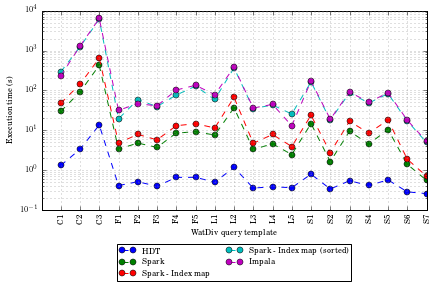

In [14]:
# Grid lines
#plt.figure(figsize=(20,10))

hdt,       = plt.semilogy(range(1, averages_hdt.index.shape[0]+1),       averages_hdt["time"],       '--o')
spark,     = plt.semilogy(range(1, averages_spark.index.shape[0]+1),     averages_spark["time"],     '--o')
spark_it,  = plt.semilogy(range(1, averages_spark_it.index.shape[0]+1),  averages_spark_it["time"],  '--o')
#spark_its, = plt.semilogy(range(1, averages_spark_its.index.shape[0]+1), averages_spark_its["time"], '--o')
#impala,    = plt.semilogy(range(1, averages_impala.index.shape[0]+1),   averages_impala["time"],     '--o')
#impala_it, = plt.semilogy(range(1, averages_impala_it.index.shape[0]+1), averages_impala_it["time"], '--o')

plt.ylabel("Execution time (s)")
plt.xlabel("WatDiv query template")
plt.xticks(range(1, averages_hdt.index.shape[0]+1), averages_hdt.index, rotation="vertical")
plt.grid(True, which="both", color="gray")

legend = plt.legend([hdt, spark, spark_it, impala, impala_it], 
                    ["HDT", "Spark", "Spark - Index map", "Spark - Index map (sorted)", "Impala", "Impala - Index map"],
                    loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.savefig("line_plot_500k_2c.pdf", bbox_extra_artists=(legend,), bbox_inches='tight')
#plt.show()

In [15]:
latexify(columns=1)

/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:872: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


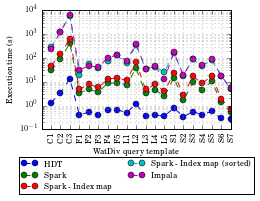

In [16]:
# Grid lines
#plt.figure(figsize=(20,10))

hdt,       = plt.semilogy(range(1, averages_hdt.index.shape[0]+1),       averages_hdt["time"],       '--o')
spark,     = plt.semilogy(range(1, averages_spark.index.shape[0]+1),     averages_spark["time"],     '--o')
spark_it,  = plt.semilogy(range(1, averages_spark_it.index.shape[0]+1),  averages_spark_it["time"],  '--o')
#spark_its, = plt.semilogy(range(1, averages_spark_its.index.shape[0]+1), averages_spark_its["time"], '--o')
impala,    = plt.semilogy(range(1, averages_impala.index.shape[0]+1),   averages_impala["time"],     '--o')
impala_it, = plt.semilogy(range(1, averages_impala_it.index.shape[0]+1), averages_impala_it["time"], '--o')

plt.ylabel("Execution time (s)")
plt.xlabel("WatDiv query template")
plt.xticks(range(1, averages_hdt.index.shape[0]+1), averages_hdt.index, rotation="vertical")
plt.grid(True, which="both", color="gray")

legend = plt.legend([hdt, spark, spark_it, impala, impala_it], 
                    ["HDT", "Spark", "Spark - Index map", "Spark - Index map (sorted)", "Impala", "Impala - Index map"],
                    loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

plt.savefig("line_plot_500k_1c.pdf", bbox_extra_artists=(legend,), bbox_inches='tight')
#plt.show()

In [19]:
latexify(columns=2)

/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:872: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


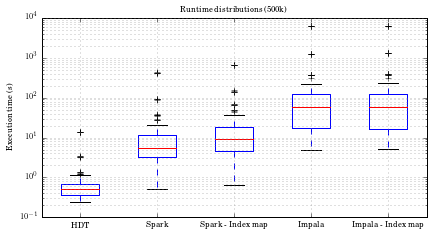

In [20]:
#ax = results_impala_100K["sec"].plot.box(return_type="axes")
temp = pd.DataFrame()
temp["hdt"]       = results_hdt["time"]
temp["spark"]     = results_spark["time"]
temp["spark_it"]  = results_spark_it["time"]
#temp["spark_its"] = results_spark_its["time"]
temp["impala"]    = results_impala["time"]
temp["impala_it"] = results_impala_it["time"]

#plt.boxplot(temp)
temp.plot.box()
plt.yscale('log')
plt.xticks(range(1, 6), ["HDT", "Spark", "Spark - Index map", "Impala", "Impala - Index map"])

#plt.gca().spines['bottom'].set_color('white')
#plt.gca().spines['top'].set_color('white') 
#plt.gca().spines['right'].set_color('white')
#plt.gca().spines['left'].set_color('white')

#plt.boxplot(results_impala_100K["secs"])
plt.grid(True, which="both", color="gray")
plt.ylabel("Execution time (s)")
plt.xlabel("Runtime distributions (500k)")
plt.gca().xaxis.set_label_position('top') 

plt.savefig("boxplot_500k.pdf")

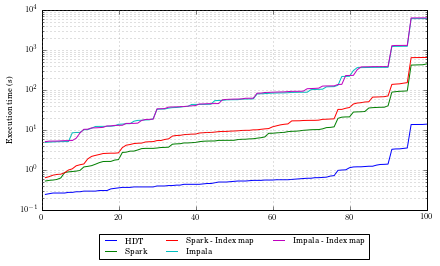

In [21]:
# Grid lines
plt.figure()

sorted_results_hdt       = results_hdt.sort_values(["time"])
sorted_results_spark     = results_spark.sort_values(["time"])
sorted_results_spark_it  = results_spark_it.sort_values(["time"])
#sorted_results_spark_its = results_spark_its.sort_values(["time"])
sorted_results_impala    = results_impala.sort_values(["time"])
sorted_results_impala_it = results_impala_it.sort_values(["time"])

hdt,       = plt.semilogy(range(1, results_hdt.index.shape[0]+1),              sorted_results_hdt["time"], '-')
spark,     = plt.semilogy(range(1, sorted_results_spark.index.shape[0]+1),     sorted_results_spark["time"], '-')
spark_it,  = plt.semilogy(range(1, sorted_results_spark_it.index.shape[0]+1),  sorted_results_spark_it["time"], '-')
#spark_its, = plt.semilogy(range(1, sorted_results_spark_its.shape[0]+1),       sorted_results_spark_its["time"], '-')
impala,    = plt.semilogy(range(1, sorted_results_impala.index.shape[0]+1),    sorted_results_impala["time"], '-')
impala_it, = plt.semilogy(range(1, sorted_results_impala_it.index.shape[0]+1), sorted_results_impala_it["time"], '-')

plt.ylabel("Execution time (s)")
plt.grid(True, which="both", color="gray")

legend = plt.legend([hdt, spark, spark_it, impala, impala_it], 
                    ["HDT", "Spark", "Spark - Index map", "Impala", "Impala - Index map"],
                    loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)

plt.savefig("line_plot_2_500k.pdf", bbox_extra_artists=(legend,), bbox_inches='tight')
#plt.show()

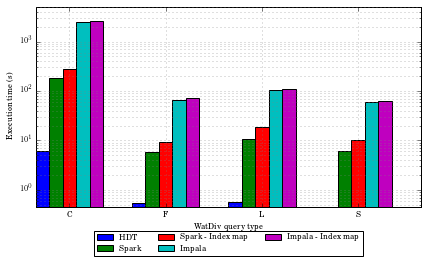

In [23]:
fig, ax = plt.subplots()

ind = np.arange(averages_class_hdt.index.shape[0])  # the x locations for the groups
width = 7/50                                  # the width of the bars
#width= 0.35

prop_iter = iter(plt.rcParams['axes.prop_cycle'])
hdt       = ax.bar(ind,           averages_class_hdt.time,       width, log=True, color=next(prop_iter)['color'])
spark     = ax.bar(ind + width,   averages_class_spark.time,     width, log=True, color=next(prop_iter)['color'])
spark_it  = ax.bar(ind + 2*width, averages_class_spark_it.time,  width, log=True, color=next(prop_iter)['color'])
#spark_its = ax.bar(ind + 3*width, averages_class_spark_its.time, width, log=True, color=next(prop_iter)['color'])
impala    = ax.bar(ind + 3*width, averages_class_impala.time,    width, log=True, color=next(prop_iter)['color'])
impala_it = ax.bar(ind + 4*width, averages_class_impala_it.time, width, log=True, color=next(prop_iter)['color'])

plt.ylabel("Execution time (s)")
plt.xlabel("WatDiv query type")
ax.set_xticks(ind + 2.5*width)
ax.set_xticklabels(averages_class_hdt.index)
ax.set_ylim(0,5000)
plt.grid(True, which="both", color="gray")

legend = plt.legend([hdt, spark, spark_it, impala, impala_it], 
                    ["HDT",  "Spark", "Spark - Index map", "Impala", "Impala - Index map"],
                    loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)

plt.savefig("barplot_500k.pdf", bbox_extra_artists=(legend,), bbox_inches='tight')
#plt.show()

/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:872: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


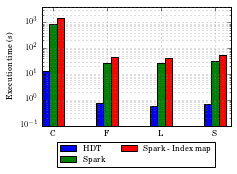

In [10]:
latexify(columns=1)
fig, ax = plt.subplots()

ind = np.arange(averages_class_hdt.index.shape[0])  # the x locations for the groups
width = 7/50                                  # the width of the bars
#width= 0.35

prop_iter = iter(plt.rcParams['axes.prop_cycle'])
hdt       = ax.bar(ind,           averages_class_hdt.time,       width, log=True, color=next(prop_iter)['color'])
spark     = ax.bar(ind + width,   averages_class_spark.time,     width, log=True, color=next(prop_iter)['color'])
spark_it  = ax.bar(ind + 2*width, averages_class_spark_it.time,  width, log=True, color=next(prop_iter)['color'])
#spark_its = ax.bar(ind + 3*width, averages_class_spark_its.time, width, log=True, color=next(prop_iter)['color'])
#impala    = ax.bar(ind + 3*width, averages_class_impala.time,    width, log=True, color=next(prop_iter)['color'])
#impala_it = ax.bar(ind + 4*width, averages_class_impala_it.time, width, log=True, color=next(prop_iter)['color'])

plt.ylabel("Execution time (s)")
plt.xlabel("WatDiv query type")
ax.set_xticks(ind + 1.5*width)
ax.set_xticklabels(averages_class_hdt.index)
ax.set_ylim(0.1,4000)
plt.grid(True, which="both", color="gray")

legend = plt.legend([hdt, spark, spark_it], 
                    ["HDT",  "Spark", "Spark - Index map"],
                    loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

plt.savefig("barplot_1M_2c.pdf", bbox_extra_artists=(legend,), bbox_inches='tight')
#plt.show()

/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:872: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


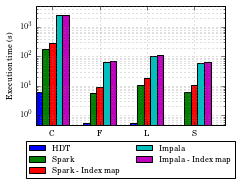

In [9]:
latexify(columns=1)
fig, ax = plt.subplots()

ind = np.arange(averages_class_hdt.index.shape[0])  # the x locations for the groups
width = 7/50                                  # the width of the bars
#width= 0.35

prop_iter = iter(plt.rcParams['axes.prop_cycle'])
hdt       = ax.bar(ind,           averages_class_hdt.time,       width, log=True, color=next(prop_iter)['color'])
spark     = ax.bar(ind + width,   averages_class_spark.time,     width, log=True, color=next(prop_iter)['color'])
spark_it  = ax.bar(ind + 2*width, averages_class_spark_it.time,  width, log=True, color=next(prop_iter)['color'])
#spark_its = ax.bar(ind + 3*width, averages_class_spark_its.time, width, log=True, color=next(prop_iter)['color'])
impala    = ax.bar(ind + 3*width, averages_class_impala.time,    width, log=True, color=next(prop_iter)['color'])
impala_it = ax.bar(ind + 4*width, averages_class_impala_it.time, width, log=True, color=next(prop_iter)['color'])

plt.ylabel("Execution time (s)")
plt.xlabel("WatDiv query type")
ax.set_xticks(ind + 2.5*width)
ax.set_xticklabels(averages_class_hdt.index)
ax.set_ylim(0,5000)
plt.grid(True, which="both", color="gray")

legend = plt.legend([hdt, spark, spark_it, impala, impala_it], 
                    ["HDT",  "Spark", "Spark - Index map", "Impala", "Impala - Index map"],
                    loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

plt.savefig("barplot_500k_2c.pdf", bbox_extra_artists=(legend,), bbox_inches='tight')
#plt.show()

In [5]:
# Boxplot
results_spark_100K = pd.read_csv("output_time_spark_100k.log", names=["query", "time"])
results_impala_100K = pd.read_csv("output_time_impala_100k.log", names=["query", "time"])

In [ ]:
# Sorted per execution time